# CONVERTING ALPHA CHANNELS AND .WEBP FORMATS

# CONVERTING ORIGINAL SET OF IMAGES

Most importantly, some images contain alpha channels, and need to be universally changed to RGB format, in order to be stored as JPEG images.

Sometimes, the module imghdr will not recognise the image file extension based on the way it confirms its decisions.
```
Tensorflow/workspace/images/test/Lake_lake188.jpg is not an image
```
Using PIL and opening these images will confirm that these are indeed images

Let's try to create a model using all my training data! It's worthwhile to remember that the classes have an uneven amount of images, but this shouldn't disturb the model on first glance, as the hay-bales & humans datasets look trustworthy:
```
Class: birds, Count: 459
Class: car, Count: 363
Class: cliff, Count: 343
Class: pool, Count: 421
Class: tree, Count: 632
Class: cloud, Count: 815
Class: hay-bale, Count: 3615
Class: human, Count: 8014
Class: House, Count: 529
Class: Lake, Count: 220
```
 First, as was spotted in the smaller subset of data, I have to search for any WEBP files which Tensorflow cannot read:

In [ ]:
folder_path = "/content/drive/MyDrive/Tensorflow/workspace/images/train"

extensions = set()

for root, _, files in os.walk(folder_path):
  for file in files:
    if not file.endswith(".xml"):
      filename, extension = os.path.splitext(file)
      extensions.add(extension.lower())  # Convert to lowercase for consistency

print("File extensions not ending with '.xml':")
for ext in extensions:
  print(ext)

File extensions not ending with '.xml':
.db
.jpg
.jpeg
.png


The available extensions are .jpg, .jpeg, and .png (the .db file corresponds to an automatically created 'Thumbs.db' file). Let's add these three extensions to the function below:

In [ ]:
from pathlib import Path
import imghdr

data_dir = "/content/drive/MyDrive/Tensorflow/workspace/images/train2"
image_extensions = [".jpg", ".png", ".jpeg"]    # my extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]

for filepath in Path(data_dir).rglob("*"):
  if filepath.suffix.lower() in image_extensions:
    img_type = imghdr.what(filepath)
    if img_type is None:
      print(f"{filepath} is not an image")
    elif img_type not in img_type_accepted_by_tf:
      print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

/content/drive/MyDrive/Tensorflow/workspace/images/train2/Lake_lake116.jpg is a webp, not accepted by TensorFlow
/content/drive/MyDrive/Tensorflow/workspace/images/train2/Lake_lake49.jpg is a webp, not accepted by TensorFlow
/content/drive/MyDrive/Tensorflow/workspace/images/train2/Lake_lake129.jpg is a webp, not accepted by TensorFlow
/content/drive/MyDrive/Tensorflow/workspace/images/train2/Lake_lake75.jpg is not an image
/content/drive/MyDrive/Tensorflow/workspace/images/train2/Lake_lake55.jpg is a webp, not accepted by TensorFlow
/content/drive/MyDrive/Tensorflow/workspace/images/train2/Lake_lake70.jpg is a webp, not accepted by TensorFlow
/content/drive/MyDrive/Tensorflow/workspace/images/train2/Lake_lake80.jpg is not an image
/content/drive/MyDrive/Tensorflow/workspace/images/train2/Lake_lake112.jpg is a webp, not accepted by TensorFlow
/content/drive/MyDrive/Tensorflow/workspace/images/train2/Lake_lake12.jpg is a webp, not accepted by TensorFlow
/content/drive/MyDrive/Tensorflow

Removing the .db file:

In [ ]:
file_path = "/content/drive/MyDrive/Tensorflow/workspace/images/test/cliff_Thumbs.db"

try:
  os.remove(file_path)
  print(f"File '{file_path}' has been removed.")
except FileNotFoundError:
  print(f"File '{file_path}' not found.")
except Exception as e:
  print(f"An error occurred while trying to remove '{file_path}': {e}")

File '/content/drive/MyDrive/Tensorflow/workspace/images/test/cliff_Thumbs.db' has been removed.


As expected, most of the manually sourced Google images have been marked as WEBP images. We need to convert these to JPEG format to continue with the whole training folder. I assume the testing folder also presents the same issue.

Some images contain an alpha channel along with the typical RGB colour channels. JPEG images simply use only three channels. The alpha channel is sometimes included to determine the opacity of a certain number of pixels, when placed over another image or background. When removing the alpha channel, all the pixels are fully opaque.

In [ ]:
folder_path = "/content/drive/MyDrive/Tensorflow/workspace/images/train"
for root, _, files in os.walk(folder_path):
  for file in files:
    if not file.endswith(".xml"):
      image_path = os.path.join(root, file)
      img = Image.open(image_path)

      if img.mode == "RGBA":
        print(f"Image '{file}' has an alpha channel.")

Image 'Lake_lake139.jpg' has an alpha channel.
Image 'Lake_lake45.png' has an alpha channel.
Image 'Lake_lake64.png' has an alpha channel.
Image 'cloud116.jpg' has an alpha channel.
Image 'cloud103.png' has an alpha channel.
Image 'cloud108.png' has an alpha channel.
Image 'cloud67.png' has an alpha channel.
Image 'cloud83.png' has an alpha channel.
Image 'cloud77.jpg' has an alpha channel.
Image 'cloud92.png' has an alpha channel.


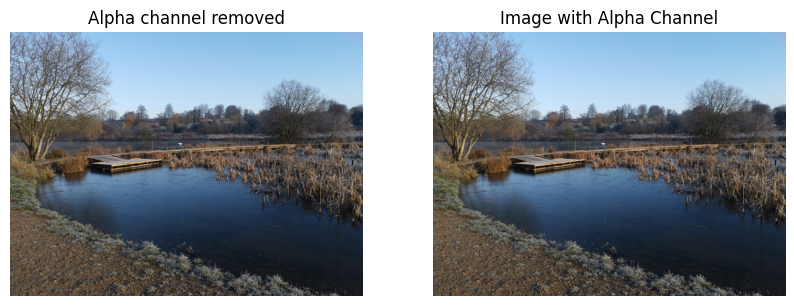

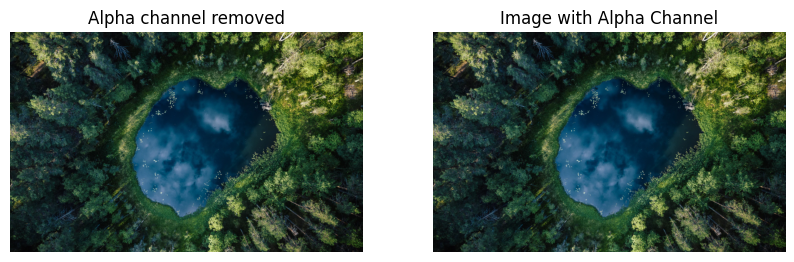

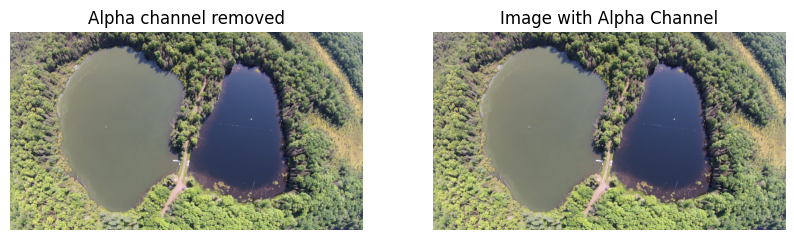

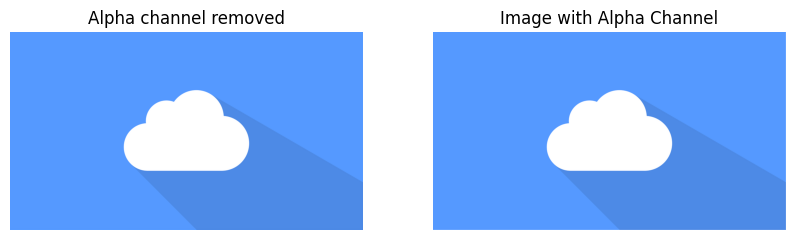

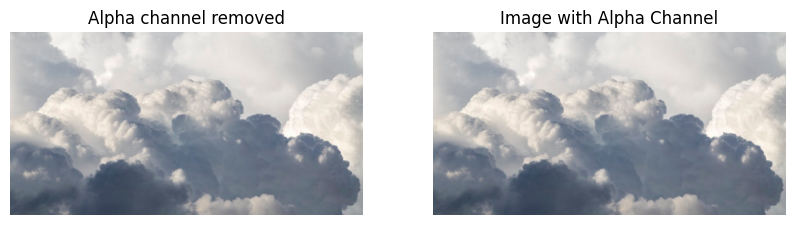

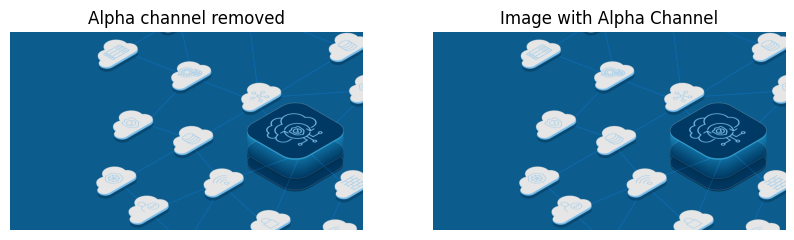

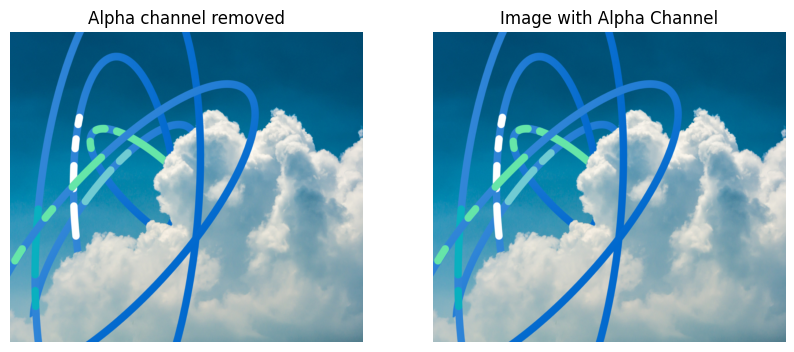

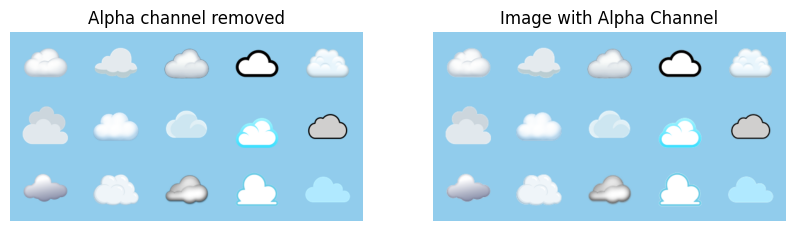

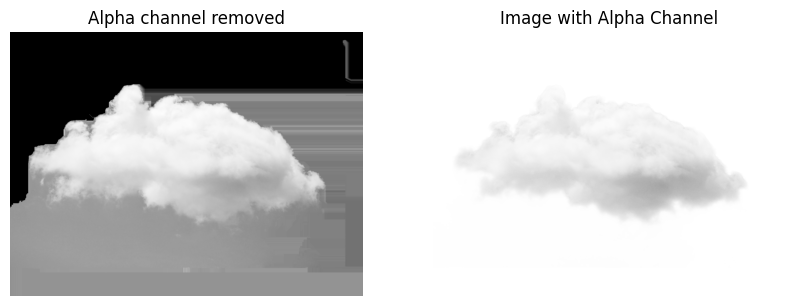

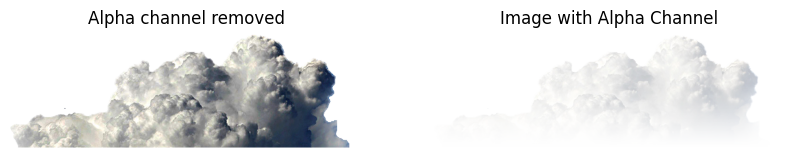

In [ ]:
for root, _, files in os.walk(folder_path):
  for file in files:
    if not file.endswith(".xml"):
      image_path = os.path.join(root, file)
      img = Image.open(image_path)

      if img.mode == "RGBA":
        # Open the original image (without alpha channel)
        original_img = img.convert("RGB")

        # Display the images side by side
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(original_img)
        axes[0].set_title("Alpha channel removed")
        axes[0].axis("off")

        axes[1].imshow(img)
        axes[1].set_title("Image with Alpha Channel")
        axes[1].axis("off")

        plt.show()

Looking through the above images, it seems like apart from the two cloud images at the end, the result of removing the alpha channel is unnoticeable. The alpha channel is most likely present as a result of adding a slight glossy look to some of the commercial images, while others were probably added on Photoshop. It's safe to remove these when creating my converted JPEG training folder.

I must modify the function used in **Processing the pixel values to help image processing**, to convert each image to RGB first, and then convert to JPEG format.

In [ ]:
data_dir = "/content/drive/MyDrive/Tensorflow/workspace/images/train"
for image_path in Path(data_dir).rglob("*"):
  print(image_path)

In [ ]:
data_dir = "/content/drive/MyDrive/Tensorflow/workspace/images/train"
for image_path in Path(data_dir).rglob("*"):
  print(image_path.stem)

In [ ]:
data_dir = "/content/drive/MyDrive/Tensorflow/workspace/images/train2"
output_dir = "/content/drive/MyDrive/Tensorflow/workspace/images/train2_converted"
image_extensions = [".jpg", ".png", ".webp", ".jpeg"]

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for image_path in Path(data_dir).rglob("*"):
  if image_path.suffix.lower() in image_extensions:
    img_type = imghdr.what(image_path)
    if img_type is not None and img_type == "webp":
      img = Image.open(image_path)
      img = img.convert("RGB")  # Convert to RGB mode
      output_image_path = os.path.join(output_dir, image_path.name)
      img.save(output_image_path, "JPEG")
      print(f"Converted {image_path} to JPEG")

      # Find corresponding XML annotation file
      xml_filename = image_path.stem + ".xml"
      xml_path = os.path.join(data_dir, xml_filename)
      if os.path.exists(xml_path):
        output_xml_path = os.path.join(output_dir, xml_filename)
        shutil.copy(xml_path, output_xml_path)
        print(f"Copied {xml_path} to {output_xml_path}")

      else:
        output_image_path = os.path.join(output_dir, image_path.name)
        img = Image.open(image_path)
        img = img.convert("RGB")  # Convert to RGB mode
        img.save(output_image_path)
        print(f"Copying {image_path} as it is")

        # Find corresponding XML annotation file
        xml_filename = image_path.stem + ".xml"
        xml_path = os.path.join(data_dir, xml_filename)
        if os.path.exists(xml_path):
          output_xml_path = os.path.join(output_dir, xml_filename)
          shutil.copy(xml_path, output_xml_path)
          print(f"Copied {xml_path} to {output_xml_path}")

In [ ]:
def count_images_and_annotations(folder_path):
  image_count = 0
  annotation_count = 0

  for root, dirs, files in os.walk(folder_path):
    for file in files:
      if file.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif')):
        image_count += 1
      elif file.lower().endswith('.xml'):
        annotation_count += 1

  return image_count, annotation_count

train_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/NEWERtrain2_converted'
image_count, annotation_count = count_images_and_annotations(train_folder)

print(f"Number of image files in 'train': {image_count}")
print(f"Number of annotation files in 'train': {annotation_count}")

Number of image files in 'train': 3138
Number of annotation files in 'train': 3138


That's a converted training folder created, now it's time for the test folder to undergo the same.

In [ ]:
import shutil

In [ ]:
data_dir = "/content/drive/MyDrive/Tensorflow/workspace/images/test2"
output_dir = "/content/drive/MyDrive/Tensorflow/workspace/images/test2_converted"
image_extensions = [".jpg", ".png", ".webp", ".jpeg"]

if not os.path.exists(output_dir):
  os.makedirs(output_dir)

for image_path in Path(data_dir).rglob("*"):
  if image_path.suffix.lower() in image_extensions:
    img_type = imghdr.what(image_path)
    if img_type is not None and img_type == "webp":
      img = Image.open(image_path)
      img = img.convert("RGB")  # Convert to RGB mode
      output_image_path = os.path.join(output_dir, image_path.name)
      img.save(output_image_path, "JPEG")
      print(f"Converted {image_path} to JPEG")

      # Find corresponding XML annotation file
      xml_filename = image_path.stem + ".xml"
      xml_path = os.path.join(data_dir, xml_filename)
      if os.path.exists(xml_path):
        output_xml_path = os.path.join(output_dir, xml_filename)
        shutil.copy(xml_path, output_xml_path)
        print(f"Copied {xml_path} to {output_xml_path}")

      else:
        output_image_path = os.path.join(output_dir, image_path.name)
        img = Image.open(image_path)
        img = img.convert("RGB")  # Convert to RGB mode
        img.save(output_image_path)
        print(f"Copying {image_path} as it is")

        # Find corresponding XML annotation file
        xml_filename = image_path.stem + ".xml"
        xml_path = os.path.join(data_dir, xml_filename)
        if os.path.exists(xml_path):
          output_xml_path = os.path.join(output_dir, xml_filename)
          shutil.copy(xml_path, output_xml_path)
          print(f"Copied {xml_path} to {output_xml_path}")

In [ ]:
def count_images_and_annotations(folder_path):
  image_count = 0
  annotation_count = 0

  for root, dirs, files in os.walk(folder_path):
    for file in files:
      if file.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif')):
        image_count += 1
      elif file.lower().endswith('.xml'):
        annotation_count += 1

  return image_count, annotation_count

train_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/test2_converted'
image_count, annotation_count = count_images_and_annotations(train_folder)

print(f"Number of image files in 'train': {image_count}")
print(f"Number of annotation files in 'train': {annotation_count}")

Number of image files in 'train': 2312
Number of annotation files in 'train': 2312


#WRONG FINAL CHECKS ON TRAIN/TEST IMAGE FOLDERS BEFORE BIGGER MODEL

In [ ]:
import os
from collections import defaultdict

train_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/train2_converted'

class_counts = defaultdict(int)

for xml_file in os.listdir(train_folder):
  if xml_file.endswith('.xml'):
    xml_path = os.path.join(train_folder, xml_file)
    with open(xml_path, 'r') as f:
      lines = f.readlines()
      for line in lines:
        if '<name>' in line:
          class_name = line.strip().split('<name>')[1].split('</name>')[0]
          class_counts[class_name] += 1

# Print the counts for each object class
for class_name, count in class_counts.items():
  print(f"Class: {class_name}, Count: {count}")

Class: pool, Count: 421
Class: human, Count: 8014
Class: House, Count: 529
Class: Lake, Count: 220
Class: hay-bale, Count: 3615
Class: birds, Count: 459
Class: car, Count: 363
Class: cliff, Count: 343
Class: cloud, Count: 815
Class: tree, Count: 632


In [ ]:
import os
from collections import defaultdict

train_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/test2_converted'

class_counts = defaultdict(int)

for xml_file in os.listdir(train_folder):
  if xml_file.endswith('.xml'):
    xml_path = os.path.join(train_folder, xml_file)
    with open(xml_path, 'r') as f:
      lines = f.readlines()
      for line in lines:
        if '<name>' in line:
          class_name = line.strip().split('<name>')[1].split('</name>')[0]
          class_counts[class_name] += 1

# Print the counts for each object class
for class_name, count in class_counts.items():
  print(f"Class: {class_name}, Count: {count}")

Class: human, Count: 4860
Class: pool, Count: 58
Class: hay-bale, Count: 1917
Class: House, Count: 41
Class: Lake, Count: 191
Class: cloud, Count: 83
Class: cliff, Count: 51
Class: tree, Count: 169
Class: birds, Count: 91
Class: car, Count: 57


# SECOND BACKUP WARNING (VERY IMPORTANT)

# SECOND WARNING FOR BACKUPS

You might notice that the 'train' folder became 'train2' over the course of this converting.<br>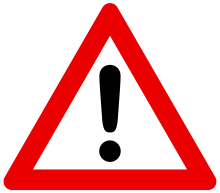 <br>**This shows the importance of backups!** I had to use my backup folder as I had accidentally moved the .xml files instead of copying them along with the images. Then, I went to delete the folder thinking they were just copies of the .xml files, but they were not!

# MODEL EVALUATION

# Model Evaluation

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
print(command)

python /content/drive/MyDrive/Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=/content/drive/MyDrive/Tensorflow/workspace/models/topdown --pipeline_config_path=/content/drive/MyDrive/Tensorflow/workspace/models/topdown/pipeline.config --checkpoint_dir=/content/drive/MyDrive/Tensorflow/workspace/models/topdown


In [ ]:
!{command}

2023-08-24 17:35:59.430812: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
W0824 17:36:02.118244 133757995962368 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0824 17:36:02.118452 133757995962368 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0824 17:36:02.118515 133757995962368 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0824 17:36:02.118577 133757995962368 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0824 17:36:02.118662 133757995962368 model_lib_v2.py:1106] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2023-08-24 17:36:03.212556: W tensorflow/core/common_runtime/gpu/gpu_bfc_alloca

# LOADING MY TRAINED MODEL FOR DISPLAYING PREDICTIONS

# Load Trained Model Checkpoint for Later use of showing predictions on images

In [ ]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# SHOWCASING DETECTION OF MY MODEL

# Showcasing the Detection on an Image

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [ ]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'TOPDOWNtest', 'watertp_23.jpg')

In [ ]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=10,
            min_score_thresh=.4,
            agnostic_mode=False
            )

plt.figure(figsize=(20, 16))
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

Images to move to training set: 'rocktp_58.jpg', 'housetp_33.jpg'

Predicting with screenshots from Tom's drone videos.

In [ ]:
import zipfile

zip_file_path = "/content/drive/MyDrive/Screenshots.zip"
extracted_folder = "/content/drive/MyDrive/drone_shots"

#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#    zip_ref.extractall(extracted_folder)

In [ ]:
image_paths = [os.path.join(extracted_folder, filename) for filename in os.listdir(extracted_folder) if filename.lower().endswith(('.jpg', '.jpeg', '.png'))]

NameError: ignored

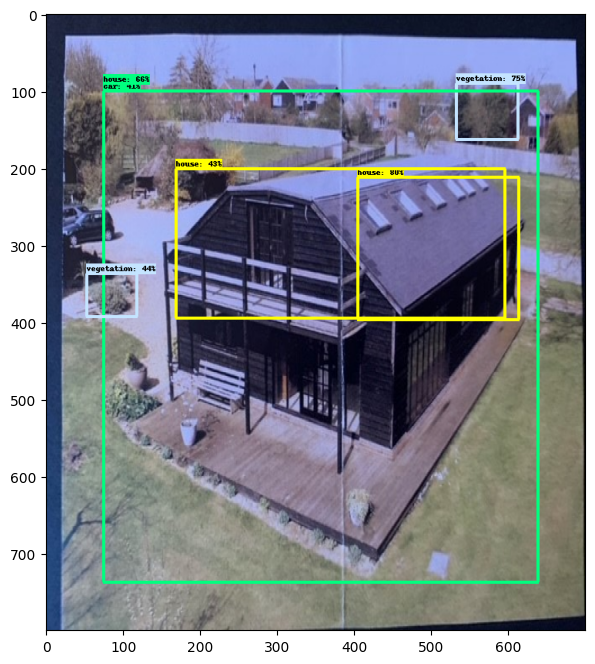

In [ ]:
#img = cv2.imread('/content/16004597-a-shallow-tranquil-rock-strewn-river-flowing-through-lush-english-countryside-with-tree-lined.jpg')
target_size = (700, 800)  # Set the target size (width, height)

# Read the image using OpenCV
image = cv2.imread('/content/farm5.jpg')

# Resize the image
resized_image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

#img = cv2.imread(image_paths[10])
#image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(resized_image, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = resized_image.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=10,
            min_score_thresh=.4,
            agnostic_mode=False
            )
#%matplotlib inline
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

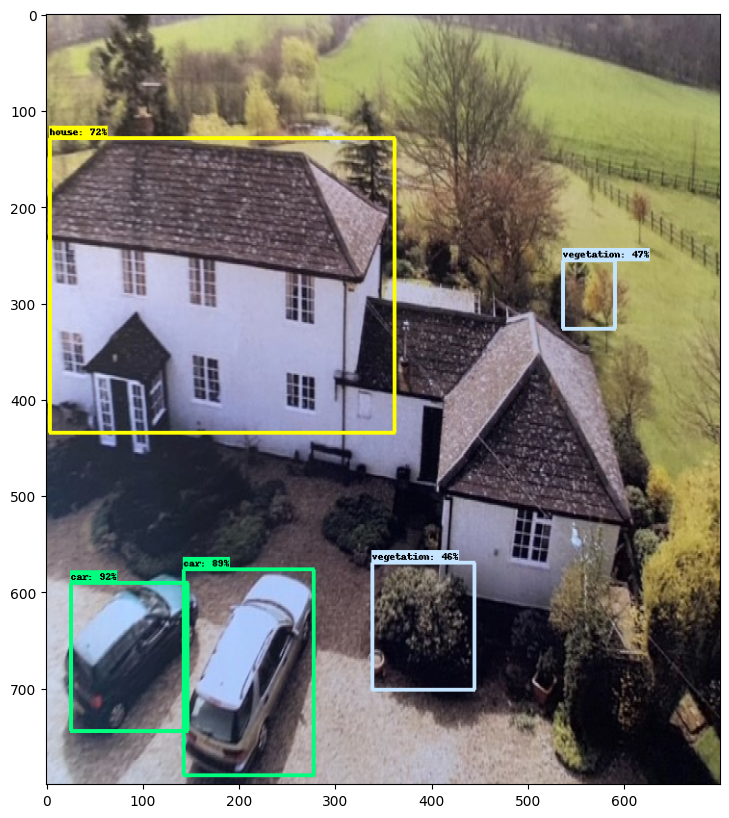

In [ ]:
%matplotlib inline
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# EVALUATION OF FIRST TRY MODEL

# Evaluation of 'starting point' model with 2000 steps and batch size = 4.

The model SSD MobileNet v2 FPN-Lite 320x320 trained on COCO2017, needless to say is not a good model at all. This might be due to a number of reasons:

* I need to train it for a longer number of training steps
* The training image dataset might contain too many images.
* I need a larger model architecture to manage the large amount of images, and the 10 classes it needs to classify.

So far, my target is just to build a model that can at least classify because these results:
```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.039
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.107
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.039
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.043
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.067
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.165
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.199
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.093
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.210
 ```
 are not satisfactory at all. Results like this are useless if I need to build a patch to fool a model, and the model is unable to do its job.

# EVALUATION SECOND TRY MODEL

# Evaluation of model with 10000 training steps and batch size 8

There's some improvement. The localisation aspect in particular looks very accurate from the test images I have detected on. The classification is still lacking in accuracy, particularly with some classes.
```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.186
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.320
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.193
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.184
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.194
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.312
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.324
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.219
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.334
 ```
 These results could still be better. The training steps should be increased and if this does not improve results sufficiently, it might be worth looking at different model architectures.

In terms of accuracy for each class, the model will be ranked by **Great**, **Sufficient**, **Bad** based on my personal opinion from testing 20 images:
<br> Birds = Bad
<br> Cars = Bad
<br> Cliffs = Bad
<br> Clouds = Bad
<br> Haybales = Great
<br> Houses = Great
<br> Lakes = Sufficient
<br> Human = Great
<br> Pools = Bad
<br> Trees = Bad
<br>
<br>Looking at these results, and also keeping the number of images available for each class:
```
Class: pool, Count: 421
Class: human, Count: 8014
Class: House, Count: 529
Class: Lake, Count: 220
Class: hay-bale, Count: 3615
Class: birds, Count: 459
Class: car, Count: 363
Class: cliff, Count: 343
Class: cloud, Count: 815
Class: tree, Count: 632
```
It is easy to see how the accuracy of detecting houses and haybales is correlated to the amount of training data available. However, this does not seem to be correct as the relatively high amount of cloud images do not ensure a good cloud detecting accuracy.
<br> Sometimes the model doesn't even predict some classes. It is unable to predict 'birds', 'trees', 'cars', 'cloud', or 'cliffs'. It is not understood why these labels are not shown to be predicted. However, the model has a high misclassification rate when attempting to label these, as it usually thinks they one of these labels: 'human', 'pool', 'haybale'.

<br> My conclusion as to arriving at a solution after these misclassification issues, is that the dataset is really imbalanced, and 'human' certainly doesn't need to have that many more images. This imbalance between classes affects the model in unforeseen ways, but  it could be unable to generalise, and to learn those smaller classes. This could be the cause for the labels which are never seen to be predicted above.
<br>Even though the high quantity classes exhibit great accuracy, there is no way I will be able to accumulate near enough images for the other classes to upscale them. Therefore, I am going to try downscaling the higher quantity classes to around 500 images.


# DELETING POOL CLASS

# Deleting Pool Images

After some frustrating developments where models were retrained on less pool data, it's time to delete the pool images. The pool only appears for a split second in Tom's video, the images are all low resolution, and the images are too augmented; sometimes it's not even a pool in the image. The model should be better off as it's dealing with less data and it won't be confused by unclear localisations when it's training.

In [ ]:
pool_imgs = []
for file in os.listdir('/content/drive/MyDrive/Diss_Backups/images/train/POOLS_train'):
  pool_imgs.append(file)
print('There are:', len(pool_imgs), 'pool images')

There are: 1298 pool images


In [ ]:
newer_pool_imgs = []
for file in os.listdir('/content/drive/MyDrive/Tensorflow/workspace/images/NEWERtrain2_converted'):
  if file.startswith('pool'):
    newer_pool_imgs.append(file)
print('There are:', len(newer_pool_imgs), 'pool images in NEWERtrain2_converted')

There are: 0 pool images in NEWERtrain2_converted


In [ ]:
start_with_pool = []
for file in os.listdir('/content/drive/MyDrive/Diss_Backups/images/train/POOLS_train'):
  if file.startswith('pool'):
    start_with_pool.append(file)

print('There are:', len(start_with_pool), 'images that start with \'pool\'')


There are: 1298 images that start with 'pool'


```
Class: birds, Count: 444
Class: car, Count: 285
Class: cliff, Count: 189
Class: cloud, Count: 178
Class: hay-bale, Count: 867
Class: House, Count: 529
Class: Lake, Count: 150
Class: human, Count: 2192
Class: pool, Count: 416
Class: tree, Count: 173
```

In [ ]:
folder_path = '/content/drive/MyDrive/Tensorflow/workspace/images/NEWERtrain2_converted'

for filename in os.listdir(folder_path):
  if filename.startswith('pool'): #and (filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.xml')):
    file_path = os.path.join(folder_path, filename)
#    os.remove(file_path)
    print(f"Deleted: {file_path}")

# REMOVING AN AMOUNT OF HUMAN IMAGES SO THAT THE CLASSES ARE MORE BALANCED

# Removing some Human images
There are 2192 image and .xml pairs that belong to the 'human' class. This is far too much and requires some removal. The people in the drone footage are not certain to appear, and they are usually very small due to being far away. Similar to 'pool' in which it was unclear how a model was able to detect an object which appears minimally in the footage: not very well, in conclusion.

In [ ]:
human_imgs = []
for file in os.listdir('/content/drive/MyDrive/Diss_Backups/images/train/PEOPLE_train'):
  human_imgs.append(file)
print('There are:', len(human_imgs), 'human files')

There are: 5502 human images


In [ ]:
newer_human_imgs = []
for file in os.listdir('/content/drive/MyDrive/Tensorflow/workspace/images/NEWERtrain2_converted'):
  if file.startswith('human'):
    newer_human_imgs.append(file)
print('There are:', len(newer_human_imgs), 'human files in NEWERtrain2_converted')

There are: 500 human images in NEWERtrain2_converted


I would like 2192-500 = 1692 pairs of image/xml files to be deleted, to make the balance of training image classes more fair.

In [ ]:
folder_path = '/content/drive/MyDrive/Tensorflow/workspace/images/NEWERtrain2_converted'
file_pattern = 'human*.jpg'
delete_limit = 1962
image_files = glob.glob(os.path.join(folder_path, file_pattern))


for image_file in image_files:
  xml_file = os.path.splitext(image_file)[0] + '.xml'

  if os.path.exists(xml_file):
    os.remove(image_file)
    os.remove(xml_file)
    print(f"Deleted: {image_file} and {xml_file}")
  else:
    print(f"XML file not found for: {image_file}")

In [ ]:
folder_path = '/content/drive/MyDrive/Tensorflow/workspace/images/test2_converted'
file_pattern = 'pool*.jpg'
delete_limit = 56

image_files = glob.glob(os.path.join(folder_path, file_pattern))

deleted_count = 0

for image_file in image_files:
  if deleted_count >= delete_limit:
    break

  xml_file = os.path.splitext(image_file)[0] + '.xml'

  if os.path.exists(xml_file):
    os.remove(image_file)
    os.remove(xml_file)
    print(f"Deleted: {image_file} and {xml_file}")
    deleted_count += 1
  else:
    print(f"XML file not found for: {image_file}")

print(f"Deleted {deleted_count} file pairs.")

In [ ]:
os.remove('/content/drive/MyDrive/Tensorflow/workspace/images/NEWERtrain2_converted/human_img_1065_jpg.rf.86b96add9109fd9ea59c04717939dee5.jpg')

In [ ]:
import os
import shutil

source_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/train3'
destination_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/NEWERtrain2_converted'
file_pattern = 'human*.jpg'
copy_limit = 250

image_files = sorted(glob.glob(os.path.join(source_folder, file_pattern)))

copied_count = 0

for image_file in image_files:
  if copied_count >= copy_limit:
    break

  xml_file = os.path.splitext(image_file)[0] + '.xml'

  if os.path.exists(xml_file):
    destination_image = os.path.join(destination_folder, os.path.basename(image_file))
    destination_xml = os.path.join(destination_folder, os.path.basename(xml_file))

    shutil.copy(image_file, destination_image)
    shutil.copy(xml_file, destination_xml)

    print(f"Copied: {image_file} and {xml_file} to {destination_folder}")
    copied_count += 1
  else:
    print(f"XML file not found for: {image_file}")

print(f"Copied {copied_count} file pairs.")

In [ ]:
import os
import shutil

source_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/test2_converted'
destination_folder = '/content/drive/MyDrive/Tensorflow/workspace/images/NEWERtrain2_converted'
file_prefix = 'Lake'
move_limit = 73

image_files = [f for f in os.listdir(source_folder) if f.startswith(file_prefix) and f.endswith('.jpg')]

moved_count = 0

for image_file in image_files:
  if moved_count >= move_limit:
    break

  xml_file = os.path.splitext(image_file)[0] + '.xml'

  if os.path.exists(os.path.join(source_folder, xml_file)):
    source_image = os.path.join(source_folder, image_file)
    source_xml = os.path.join(source_folder, xml_file)

    destination_image = os.path.join(destination_folder, image_file)
    destination_xml = os.path.join(destination_folder, xml_file)

    shutil.move(source_image, destination_image)
    shutil.move(source_xml, destination_xml)

    print(f"Moved: {image_file} and {xml_file} to {destination_folder}")
    moved_count += 1
  else:
    print(f"XML file not found for: {image_file}")

print(f"Moved {moved_count} file pairs.")

# FINAL VERDICT

# FINAL VERDICT

After removing the human images and the ppol images, and acquiring a model with the same insufficient accuracy, it was clear that there was something else fundamentally wrong with my annotation/image dataset, even after trying a large selection of models.

<br> The issue, of course, was that I had seperated each class name into about 200 images, so this choice of including a certain number of examples for each class, influenced me to only annotate objects from that one class. I failed to annotate other objects from other classes that appeared in the background of any image. This had huge improvements when I created a smaller, but more possible to curate dataset, which was able to predict every class with average-to-good confidence.